In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data
import datetime as dt

from cycler import cycler
from random import randint
import matplotlib as mpl

from get_metacritic_data import read_metacritic_csv_data

In [79]:
plt.style.use('ggplot')
mpl.rc('lines', linewidth=3)
mpl.rc('legend', fontsize=18)  # using a size in points

params = {'xtick.labelsize': 19,
          'ytick.labelsize': 19,
          'axes.labelsize': 'x-large'}
plt.rcParams.update(params)

In [80]:
def plot_data(ticker, publisher, start, end, thresh, figsize):

    # User pandas_reader.data.DataReader to load the desired data. As simple as that.
    panel_data = data.DataReader(ticker, 'yahoo', start, end)
    
    # build a df filtered for publisher
    columns = ["releasedate", "name", "metacritic", "user", "description", "genre", "rating", "publisher", "platform"]
    publisher_df = pd.DataFrame(None, columns=columns)
    for index, row in df.iterrows():
        if any(_x in row["publisher"] for _x in publisher):
            publisher_df = publisher_df.append(row, ignore_index=True)

    # get games above threshold
    good_games = publisher_df[(publisher_df.metacritic >= thresh)][['releasedate', 'name']]
    good_games.reset_index(inplace=True)

    # define colors
    color = []
    for i in range(len(good_games)):
        color.append('#%06X' % randint(0, 0xFFFFFF))


    fig = plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    ax = plt.gca()


    sns.lineplot(data=panel_data.reset_index(), x='Date', y='Close', label='Stock Price', linewidth=2, color='black', ls='-')
    for i in good_games.iterrows():
        plt.axvline(i[1][1], label=i[1][2], lw=4, color=color[i[0]], ls='--')
    plt.legend(bbox_to_anchor=(1.05, 1))


    plt.ylabel('Price', size=20)
    plt.xlabel('Date', labelpad=0, size=20)

    ax.tick_params(direction='out', length=6, width=2, which='major')
    ax.tick_params(direction='out', length=4, width=2, which='minor')
    plt.show()

In [81]:
df = read_metacritic_csv_data("metacritic_game_data.csv")

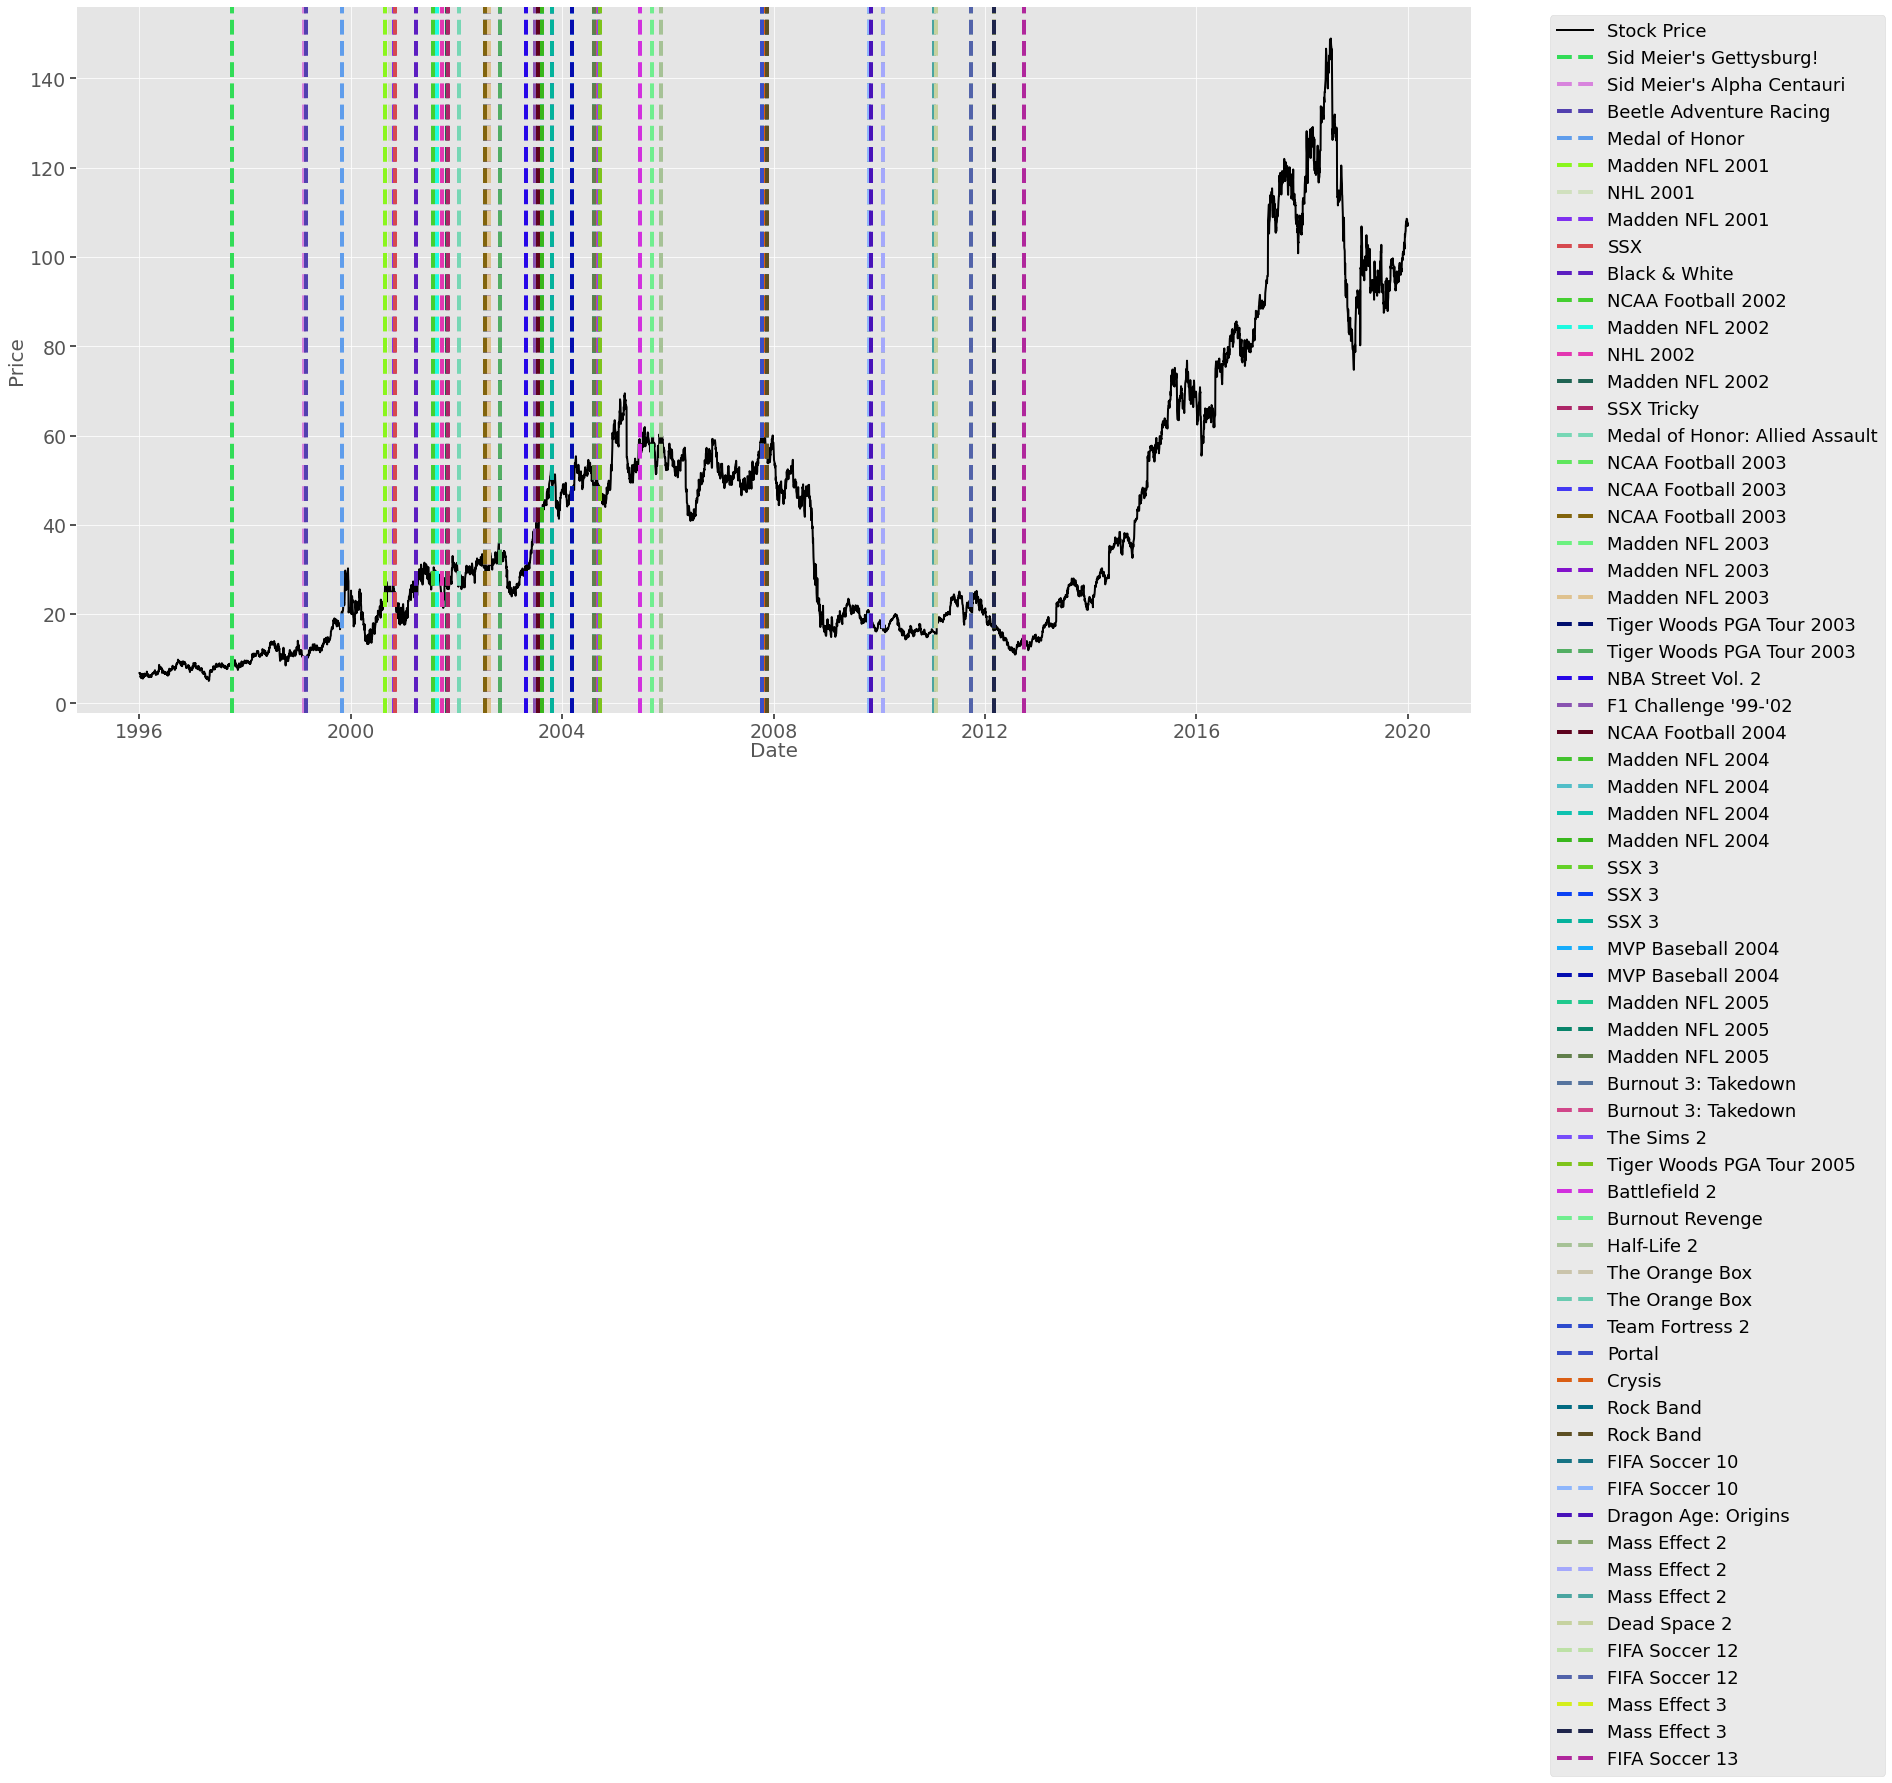

In [82]:
params = {'start':'1996-01-01',
         'end':'2019-12-31',
         'publisher':['Electronic Arts', 'EA Games', 'EA Sports'],
          'ticker':'EA',
         'thresh':90,
         'figsize':(25,13)}

plot_data(**params)

In [83]:
get_all_games_df_of_one_publisher("2K Games")


,releasedate,name,metacritic,user,description,genre,rating,publisher,platform
